In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../ML-for-stock-port-management/stock.csv')
# df.isnull().sum()

In [3]:
# X = df[['Money', 'Money5', 'SMA5', 'Last', 'MACD', 'MACD10', 'RSI']]
# X = df[['Last', 'ChangePercent', 'Money']]
X = df[['Money', 'Money5', 'SMA5', 'Last', 'MACD', 'MACD10', 'RSI', 'ChangePercent']]
# X = df[['Money', 'Money5', 'MACD', 'MACD10', 'ChangePercent']]
y = df['Status']

print(X.shape)
print(y.shape)

(814147, 8)
(814147,)


In [4]:
# k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

clf = DecisionTreeClassifier()
X = X.values
y = y.values
kf = KFold(n_splits=10)
accuracy_list = []
precision_list = []
recall_list = []
cm_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred,average='macro')
    cm = confusion_matrix(y_test, y_pred)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    cm_list.append(cm)
    print('Accuracy: ' + str(accuracy))
    print('Precision: ' + str(precision))
    print('Recall: ' + str(recall))
    print('Confusion Matrix:')
    print(cm)

# save a model using joblib
# from sklearn.externals import joblib
# joblib.dump(clf, 'dt_model_cv4.pkl')

Accuracy: 0.9232451022538845
Precision: 0.7563732742109095
Recall: 0.755796003342322
Confusion Matrix:
[[ 2395  1453   121]
 [ 1481 68738  1512]
 [  120  1562  4033]]
Accuracy: 0.9244242461462875
Precision: 0.7528872700395232
Recall: 0.7558640144922908
Confusion Matrix:
[[ 2319  1463   119]
 [ 1485 68983  1505]
 [  126  1455  3960]]
Accuracy: 0.9274212368728121
Precision: 0.7561668847768429
Recall: 0.7556974990853383
Confusion Matrix:
[[ 2224  1462   100]
 [ 1336 69471  1523]
 [  107  1381  3811]]
Accuracy: 0.9197936498188295
Precision: 0.7577871530143021
Recall: 0.7591129041346375
Confusion Matrix:
[[ 2671  1624   127]
 [ 1582 68108  1582]
 [  118  1497  4106]]
Accuracy: 0.9235767364736228
Precision: 0.7496534277918497
Recall: 0.7485668025772597
Confusion Matrix:
[[ 2216  1460   126]
 [ 1384 69075  1615]
 [   99  1538  3902]]
Accuracy: 0.9302831173616656
Precision: 0.7638785956593633
Recall: 0.769228807901266
Confusion Matrix:
[[ 2404  1367    90]
 [ 1468 69630  1337]
 [   89  1325  3

In [5]:
print('Accuracy: ' + str(sum(accuracy_list)/10))
print('Precision: ' + str(sum(precision_list)/10))
print('Recall: ' + str(sum(recall_list)/10))
print('Confusion Matrix:')
print(str(sum(cm_list)))

Accuracy: 0.9236980580304774
Precision: 0.7549675277828582
Recall: 0.7574696694996887
Confusion Matrix:
[[ 24265  14987   1091]
 [ 15242 688609  15025]
 [  1114  14662  39152]]


In [5]:
# holdout
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,average='macro')
cm = confusion_matrix(y_test, y_pred)
print('Accuracy: ' + str(accuracy))
print('Precision: ' + str(precision))
print('Recall: ' + str(recall))
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9244119633974084
Precision: 0.7571125852675477
Recall: 0.7542396355800746
Confusion Matrix:
[[  4704   3045    214]
 [  2959 137930   2912]
 [   218   2960   7888]]


# Learning Curve

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

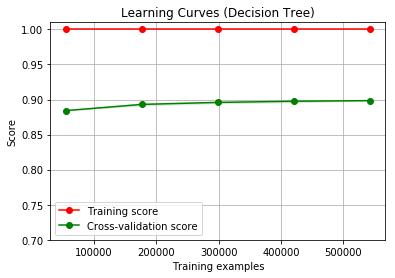

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
title = "Learning Curves (Decision Tree)"
estimator = clf
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=3, n_jobs=-1)

plt.show()